In [1]:
import numpy as np 
import scipy

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [3]:
# Example sizes
Nr = 3  # Number of rows in A and Ur
Nx = 4    # Size of identity matrix
Nv = 5    # Another dimension in A (different from Nx)

# Example matrices A and Ur
A = np.random.rand(Nr, Nx * Nx * Nv)*10  # Matrix A with size Nr x (Nx * Nx * Nv)
Ur = np.random.rand(Nx * Nv, Nr)      # Matrix Ur with size (Nx * Nv) x Nr

# Result matrix (to hold A x (Ur ⊗ I)), which should be of size Nr x (Nr * Nx)
result = np.zeros((Nr, Nr * Nx))  # This is the final result shape

In [4]:
for ii in range(Nr):
    for jj in range(Nr):
            row =  scipy.sparse.kron(Ur[:, jj], scipy.sparse.identity(Nx), format="bsr")
            result[ii, jj*Nx: Nx*(jj+1)] = A[ii, :] @ row.T

In [7]:
result2 = A @ scipy.sparse.kron(Ur, scipy.sparse.identity(Nx))

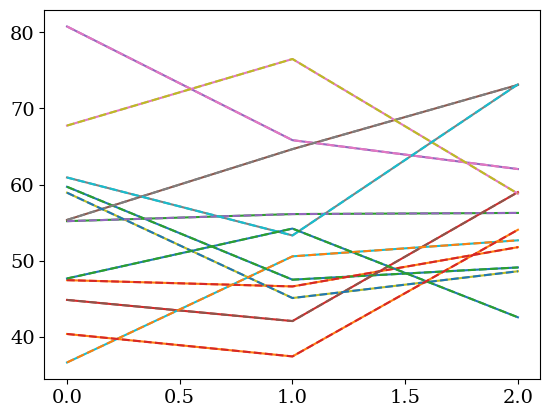

In [8]:
_ = plt.plot(result)
_ = plt.plot(result2, ls="--")

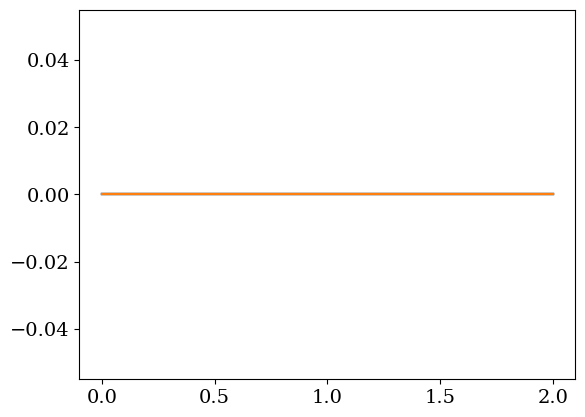

In [9]:
plt.plot(result-result2)